# How to open multi-solenoid scan database

In [1]:
import h5py, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import sys

sys.path.append('../image_processing')
from mat_image import MatImage as MI

In [2]:
# open file
#onescan   = 'cu_inj_yag02_solscan.h5'
manyscans = '2020_summer_solscan_data.h5'
f         = h5py.File(manyscans, 'r') 
# YAG and 
f.keys()

<KeysViewHDF5 ['solenoid_scan_OTR1_2020-06-21T09:48:47', 'solenoid_scan_OTR2_2020-06-21T10:00:53', 'solenoid_scan_OTR2_2020-07-09T00:57:46', 'solenoid_scan_OTR2_2020-07-09T01:07:21', 'solenoid_scan_OTR2_2020-07-09T02:35:55', 'solenoid_scan_OTR2_2020-07-09T02:44:37', 'solenoid_scan_OTR2_2020-07-09T04:45:16', 'solenoid_scan_OTR3_2020-06-21T10:13:08', 'solenoid_scan_YAG02_2020-06-21T09:17:33', 'solenoid_scan_YAG02_2020-06-21T10:28:05', 'solenoid_scan_YAG02_2020-06-21T14:33:32', 'solenoid_scan_YAG02_2020-07-09T01:15:53', 'solenoid_scan_YAG02_2020-07-09T01:32:37', 'solenoid_scan_YAG02_2020-07-09T03:05:02', 'solenoid_scan_YAG02_2020-07-09T05:01:14', 'solenoid_scan_YAG03_2020-06-21T09:27:37', 'solenoid_scan_YAG03_2020-06-21T09:38:46']>

um


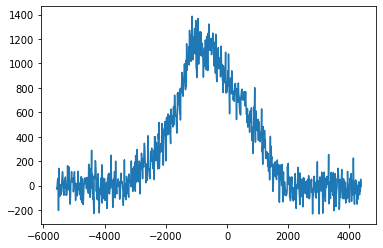

In [16]:
raw_data = f['solenoid_scan_OTR1_2020-06-21T09:48:47']['beam_data']['step0']['sample0']['raw_data']
xaxis = raw_data['XCOORD']
xprof = raw_data['XPROF']

# Unit for axis in um and intensity is arb./based on pixels
print(raw_data.attrs['unit'])
plt.plot(xaxis, xprof)
plt.show()

In [21]:
xdata = []
ydata = []

# Top group name
for key in f.keys(): 
    beam_key   = key+'/beam_data'
    beam_group = f[beam_key]
    nsteps     = len(beam_group.keys())
    if nsteps > 0:
        print(key)
        print('steps',nsteps)
        nsamples = len(beam_group['step0'])
        #print('samples',samples)
        for step in beam_group:
            #print(step)
            for sample in beam_group[step]:
                try:
                    xdata.append(beam_group[step][sample]['Gaussian']['stats_XRMS'][()])
                    ydata.append(beam_group[step][sample]['Gaussian']['stats_YRMS'][()])
                except:
                    pass

solenoid_scan_OTR1_2020-06-21T09:48:47
steps 15
solenoid_scan_OTR2_2020-06-21T10:00:53
steps 15
solenoid_scan_OTR2_2020-07-09T00:57:46
steps 7
solenoid_scan_OTR2_2020-07-09T01:07:21
steps 5
solenoid_scan_OTR2_2020-07-09T02:35:55
steps 7
solenoid_scan_OTR2_2020-07-09T02:44:37
steps 7
solenoid_scan_OTR2_2020-07-09T04:45:16
steps 7
solenoid_scan_OTR3_2020-06-21T10:13:08
steps 15
solenoid_scan_YAG02_2020-06-21T09:17:33
steps 15
solenoid_scan_YAG02_2020-06-21T10:28:05
steps 15
solenoid_scan_YAG02_2020-06-21T14:33:32
steps 7
solenoid_scan_YAG02_2020-07-09T01:15:53
steps 1
solenoid_scan_YAG02_2020-07-09T01:32:37
steps 9
solenoid_scan_YAG02_2020-07-09T03:05:02
steps 9
solenoid_scan_YAG02_2020-07-09T05:01:14
steps 9
solenoid_scan_YAG03_2020-06-21T09:27:37
steps 15
solenoid_scan_YAG03_2020-06-21T09:38:46
steps 15


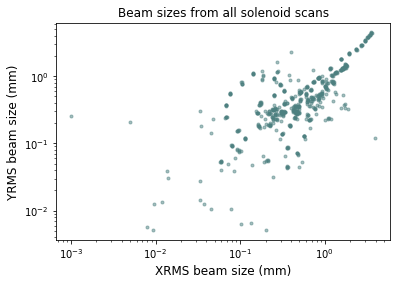

In [30]:
x = np.array(xdata)*10**-3
y = np.array(ydata)*10**-3
#print(len(x))
plt.plot(x,y, '.', c = [0.3,0.5,0.5], alpha=0.5)
plt.title('Beam sizes from all solenoid scans')
plt.xlabel('XRMS beam size (mm)', size=12)
plt.ylabel('YRMS beam size (mm)', size=12)
#plt.xlim(0,3)
#plt.ylim(0,3)
plt.yscale("log")
plt.xscale("log")
plt.savefig('all_beamsizes.pdf', bbox_inches='tight', dpi=600)
plt.show()